In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ronak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings as ws
ws.defaultaction='ignore'

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")

In [33]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
x=data.iloc[:,2:3].values
y=data.iloc[:,4].values

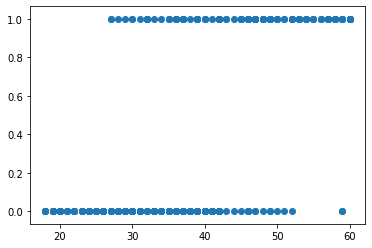

In [6]:
plt.scatter(x,y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss=StandardScaler()

In [11]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logistic_model=LogisticRegression()

In [14]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred=logistic_model.predict(x_test)

In [16]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [17]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [40]:
y_pred_prob=logistic_model.predict_proba(x_test)[:,1]

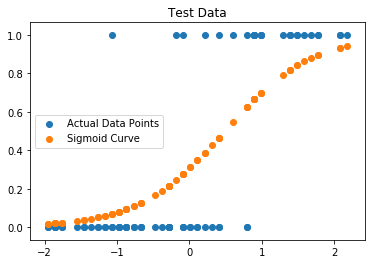

In [41]:
plt.scatter(x_test,y_test,label="Actual Data Points")
plt.scatter(x_test,y_pred_prob,label="Sigmoid Curve")
plt.title("Test Data")
plt.legend()
plt.show()

In [43]:
y_pred_train_prob=logistic_model.predict_proba(x_train)[:,1]

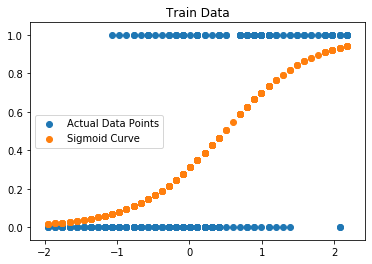

In [44]:
plt.scatter(x_train,y_train,label="Actual Data Points")
plt.scatter(x_train,y_pred_train_prob,label="Sigmoid Curve")
plt.title("Train Data")
plt.legend()
plt.show()

# Test Accuracy

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.9125

In [47]:
accuracy_score(y_train,logistic_model.predict(x_train))

0.821875

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,y_pred)

array([[50,  2],
       [ 5, 23]], dtype=int64)

In [50]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).flatten()

# Visualize